# Causal RL simulation

Jacqueline Maasch | December 2025

In [15]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define functions

In [38]:
def plot_nx(graph: nx.DiGraph = None,
            adjacency_matrix: np.ndarray = None,
            labels: list = None,
            figsize: tuple = (10,10),
            dpi: int = 200,
            node_size: int = 800,
            arrow_size: int = 10):

    '''
    Plot graph in networkx from graph or adjacency matrix.
    '''

    if graph is not None:
        g = graph
    else:
        g = nx.from_numpy_array(adjacency_matrix, create_using = nx.DiGraph)
    if labels is not None:
        labels = dict(zip(list(range(len(labels))), labels))
    plt.figure(figsize = figsize, dpi = dpi)  
    nx.draw_shell(g, 
                 node_size = node_size, 
                 labels = labels, 
                 arrowsize = arrow_size,
                 node_color = "pink",
                 with_labels = True)
    plt.show()
    plt.close()

# Construct data

In [ ]:
# First, construct time series DAG with period 1: repeats at each time step. 
# Don't include reward, just state space and action variables.
# Effect of Y0 on Y1 goes from null to nonzero under treatment A0 = 1.

# Test d-separation

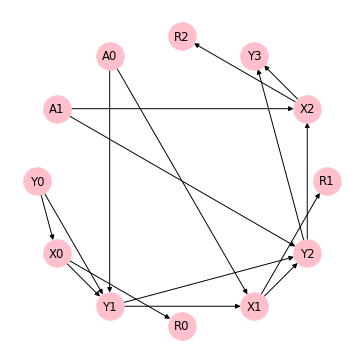

S2 _|_ S0 | S1 : True


In [43]:
G = nx.DiGraph()
G.add_edges_from(
    [
        ("Y0", "X0"),
        ("Y0", "Y1"),
        ("X0", "Y1"),
        ("X0", "R0"),
        #
        ("Y1", "X1"),
        ("Y1", "Y2"),
        ("X1", "Y2"),
        ("X1", "R1"),
        #
        ("Y2", "X2"),
        ("Y2", "Y3"),
        ("X2", "Y3"),
        ("X2", "R2"),
        #
        ("A0", "Y1"),
        ("A0", "X1"),
        ("A1", "Y2"),
        ("A1", "X2")
    ]
)
plot_nx(adjacency_matrix = nx.to_numpy_array(G), 
        labels = list(G.nodes), 
        figsize = (5,5),
        dpi = 70)

# Test for Markovian property.
# S0 = X0,Y0; S1 = X1,Y1; S2 = X2,Y2
S0, S1, S2 = ({"X0","Y0"}, {"X1","Y1"}, {"X2","Y2"})
print("S2 _|_ S0 | S1 :", nx.is_d_separator(G, S0, S2, S1))